In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.interpolate
import scipy.spatial.transform as stf
import re
import matplotlib.pyplot as plt
%matplotlib inline

# Standard (no realsense, no frame skipping)

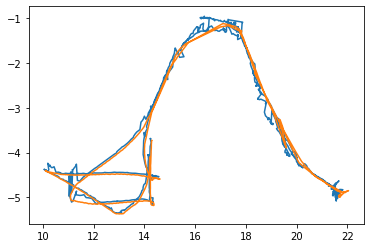

/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


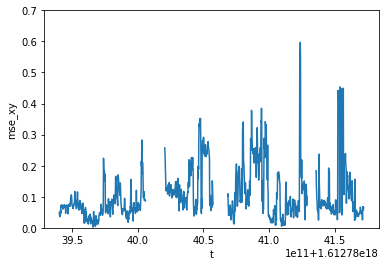

Mean: 0.109, Median: 0.080, Std: 0.088


In [30]:
# launch file: realsense_experiments/pickelhaube_full_rumlang1.launch

icp = pd.read_csv('~/git/background_foreground_segmentation/logs/pickelhaube_full_rumlang1_icp_3.csv')
leica = pd.read_csv('~/git/background_foreground_segmentation/logs/pickelhaube_full_rumlang1_leica_3.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
figure0, ax0 = plt.subplots()
ax0.plot(icp['trans_x'], icp['trans_y'])
ax0.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
# fill gaps with nan
deltas = leica['headerstamp'].diff()
for gap_idx in deltas[deltas > 1e9].index:
    icp['rmse_xy'][np.logical_and(icp['headerstamp'] > leica['headerstamp'][gap_idx -1 ], icp['headerstamp'] < leica['headerstamp'][gap_idx])] = np.nan

figure1, ax1 = plt.subplots()
ax1.plot(icp['headerstamp'], icp['rmse_xy'])
ax1.set_ylim(0, 0.7)
ax1.set_xlabel('t')
ax1.set_ylabel('mse_xy')
plt.show()
#ax = icp.plot('headerstamp', 'rmse_xy')
#ax.set_ylim(0, 0.7)
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

figure1.savefig("presentation_figures/loc_standard.pdf", bbox_inches='tight')
figure1.savefig("presentation_figures/loc_standard.png", bbox_inches='tight')


# Realsense (no frame skipping)

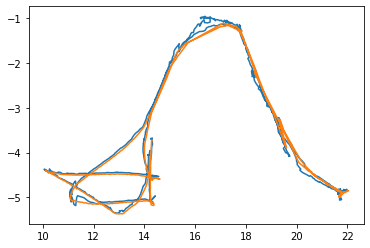

/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


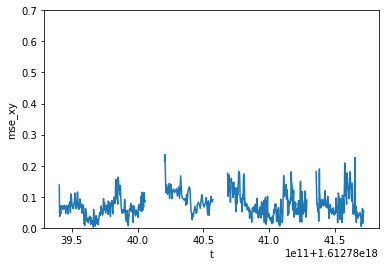

Mean: 0.073, Median: 0.067, Std: 0.038


In [29]:
# launch file: realsense_experiments/pickelhaube_full_rumlang1_dyn.launch

icp = pd.read_csv('~/git/background_foreground_segmentation/logs/pickelhaube_full_rumlang1_dyn_icp_6.csv')
leica = pd.read_csv('~/git/background_foreground_segmentation/logs/pickelhaube_full_rumlang1_dyn_leica_6.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
figure0, ax0 = plt.subplots()
ax0.plot(icp['trans_x'], icp['trans_y'])
ax0.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
# fill gaps with nan
deltas = leica['headerstamp'].diff()
for gap_idx in deltas[deltas > 1e9].index:
    icp['rmse_xy'][np.logical_and(icp['headerstamp'] > leica['headerstamp'][gap_idx -1 ], icp['headerstamp'] < leica['headerstamp'][gap_idx])] = np.nan

figure1, ax1 = plt.subplots()
ax1.plot(icp['headerstamp'], icp['rmse_xy'])
ax1.set_ylim(0, 0.7)
ax1.set_xlabel('t')
ax1.set_ylabel('mse_xy')
plt.show()
#ax = icp.plot('headerstamp', 'rmse_xy')
#ax.set_ylim(0, 0.7)
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

figure1.savefig("presentation_figures/loc_realsense.pdf", bbox_inches='tight')
figure1.savefig("presentation_figures/loc_realsense.png", bbox_inches='tight')


# Realsense (RT, with frame skipping)

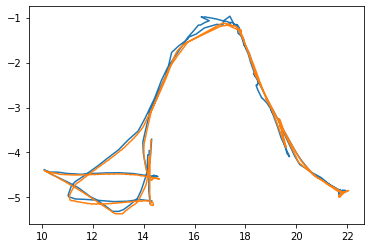

/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


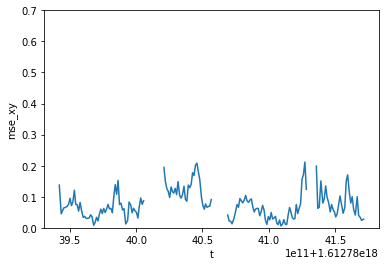

Mean: 0.075, Median: 0.067, Std: 0.045


In [36]:
# launch file: realsense_experiments/pickelhaube_rumlang1_rt.launch

icp = pd.read_csv('~/git/background_foreground_segmentation/logs/pickelhaube_rumlang1_rt_icp_1.csv')
leica = pd.read_csv('~/git/background_foreground_segmentation/logs/pickelhaube_rumlang1_rt_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
figure0, ax0 = plt.subplots()
ax0.plot(icp['trans_x'], icp['trans_y'])
ax0.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
# fill gaps with nan
deltas = leica['headerstamp'].diff()
for gap_idx in deltas[deltas > 1e9].index:
    icp['rmse_xy'][np.logical_and(icp['headerstamp'] > leica['headerstamp'][gap_idx -1 ], icp['headerstamp'] < leica['headerstamp'][gap_idx])] = np.nan

figure1, ax1 = plt.subplots()
ax1.plot(icp['headerstamp'], icp['rmse_xy'])
ax1.set_ylim(0, 0.7)
ax1.set_xlabel('t')
ax1.set_ylabel('mse_xy')
plt.show()
#ax = icp.plot('headerstamp', 'rmse_xy')
#ax.set_ylim(0, 0.7)
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

figure1.savefig("presentation_figures/loc_realsense_rt.pdf", bbox_inches='tight')
figure1.savefig("presentation_figures/loc_realsense_rt.png", bbox_inches='tight')


# EKF (no frame skipping)

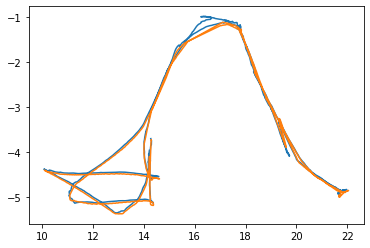

/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


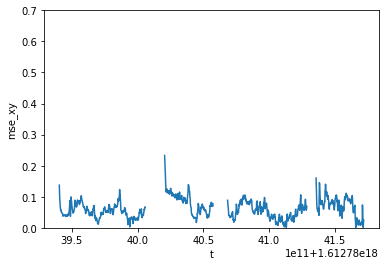

Mean: 0.061, Median: 0.058, Std: 0.030


In [27]:
# launch file: realsense_experiments/pickelhaube_rumlang1_ekf.launch

icp = pd.read_csv('~/git/background_foreground_segmentation/logs/pickelhaube_rumlang1_ekf_icp_1.csv')
leica = pd.read_csv('~/git/background_foreground_segmentation/logs/pickelhaube_rumlang1_ekf_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
figure0, ax0 = plt.subplots()
ax0.plot(icp['trans_x'], icp['trans_y'])
ax0.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
# fill gaps with nan
deltas = leica['headerstamp'].diff()
for gap_idx in deltas[deltas > 1e9].index:
    icp['rmse_xy'][np.logical_and(icp['headerstamp'] > leica['headerstamp'][gap_idx -1 ], icp['headerstamp'] < leica['headerstamp'][gap_idx])] = np.nan

figure1, ax1 = plt.subplots()
ax1.plot(icp['headerstamp'], icp['rmse_xy'])
ax1.set_ylim(0, 0.7)
ax1.set_xlabel('t')
ax1.set_ylabel('mse_xy')
plt.show()
#ax = icp.plot('headerstamp', 'rmse_xy')
#ax.set_ylim(0, 0.7)
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

figure1.savefig("presentation_figures/loc_ekf.pdf", bbox_inches='tight')
figure1.savefig("presentation_figures/loc_ekf.png", bbox_inches='tight')
